<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
!nvidia-smi

Fri Feb 19 05:44:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.4.1


In [3]:
# !pip install -q tensorflow==2.3.0

In [4]:
 !git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 507), reused 1383 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 26.98 MiB/s, done.
Resolving deltas: 100% (507/507), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [5]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 215kB 10.7MB/s 
     |████████████████████████████████| 296kB 13.8MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 25.9MB 124kB/s 
     |████████████████████████████████| 174kB 59.7MB/s 
     |████████████████████████████████| 3.7MB 60.2MB/s 
     |████████████████████████████████| 706kB 49.7MB/s 
     |████████████████████████████████| 358kB 53.4MB/s 
     |████████████████████████████████| 1.2MB 54.4MB/s 
     |████████████████████████████████| 11.5MB 53.3MB/s 
     |████████████████████████████████| 37.6MB 85kB/s 
     |████████████████████████████████| 645kB 60.4MB/s 
     |████████████████████████████████| 2.2MB 52.3MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
ERROR: pandas-gbq 0.13.3 has requirement google-cloud

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [4]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving AAP_transferlearning.csv to AAP_transferlearning (1).csv


In [6]:
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(io.BytesIO(uploaded['AAP_transferlearning.csv']))# Dataset is now stored in a Pandas Dataframe

In [7]:


# df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',compression='zip', low_memory=False)

# df = pd.read_csv("./AAP/Model/AAP_training_Data_sheet1.csv")

#df['AG'] = np.random.randint(0,2,df.shape[0])

In [8]:
encode_dict = {}

def encode_cat(x):
    if x not in encode_dict.keys():
        encode_dict[x]=len(encode_dict)
    return encode_dict[x]

df['AG'] = df['AG'].apply(lambda x: encode_cat(x))

In [9]:
df.shape

(2728, 2)

In [10]:
df.tail(20)

,Description,AG
2708,Shrink link showing wrong District,37
2709,ITSOS - Issue with Logging in into P-card,37
2710,stating she is unable to access P-cards report...,37
2711,Tm said that he is not able to approve P-Card ...,37
2712,"tm trying to log into P card report, tm was a...",37
2713,CDL Forecasting file upload / HOP db For mo...,37
2714,Miscellaneous CDL Forecasting - CheckMarx Scan...,37
2715,We are under a Sales/Use Tax Audit in Louisian...,38
2716,We are under a Sales/Use Tax Audit in Texas (T...,38
2717,"Hi Carlvin,As we noticed all batches which are...",38


<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

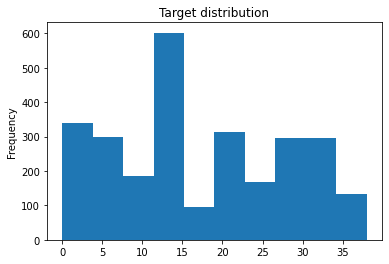

In [11]:
df.AG.plot(kind='hist',title="Target distribution")

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [12]:
train_df, remaining =train_test_split(df, random_state=42)#, train_size=0.95, stratify=df.AG.values)
valid_df,a = train_test_split(remaining, random_state=42)#, train_size=0.95, stratify=remaining.AG.values)
train_df.shape,valid_df.shape

((2046, 2), (511, 2))

In [13]:
with tf.device('/cpu:1'):
    train_data = tf.data.Dataset.from_tensor_slices((train_df['Description'].values, train_df['AG'].values))
    valid_data = tf.data.Dataset.from_tensor_slices((valid_df.Description.values,valid_df.AG.values))

    for text, label in train_data.take(1):
        print(text)
        print(label)

tf.Tensor(b'Batch with errors', shape=(), dtype=string)
tf.Tensor(10, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [14]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
label_list = list(df['AG'].unique())
 # maximum length of (token) input sequences
max_seq_len = 128
#batch_size
train_batch_size = 32 

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2

bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2',trainable=True)

#vocab file present in bert. Pass this vocab file to tokenizer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() # we get path from asset path. Path of vocab file.
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # tell tokenizer that this is an uncased version.This is to check not convert it to lower case
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case) #initiate tokenizer. 


In [15]:
#tokenize and find tokens for following strings
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [16]:
#convert tokens to token ids that bert requires.
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

In [17]:
# we will put values at begining and end for each string. That is we will be padding. Pad each string at the start and end. 


## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [18]:
# This provides a function to convert row to input features and label
# we will put values at begining and end for each string. That is we will be padding. Pad each string at the start and end. 
# bert does contextualised embeddings. padding doesn't provide any information.
#input mask is vector of same length as max_input sample. 

#input_type ids is how many inputs we give. in our case one string will be input to predict. hence we only have one id.
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_len, tokenizer=tokenizer):
    example = classifier_data_lib.InputExample(guid=None,
                                             text_a = text.numpy(),
                                             label = label.numpy()) #guid is unqiue id for each example. here one example at time therefor set as null
  
    feature = classifier_data_lib.convert_single_example(0,example, label_list, max_seq_length, tokenizer)

    return (feature.input_ids,feature.input_mask, feature.segment_ids, feature.label_id)

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [19]:
def to_feature_map(text, label):
    input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature,inp=[text,label],
                                                                Tout = [tf.int32,tf.int32,tf.int32,tf.int32])
    #set shape of each tension wrapper doesnt do that for us.
    input_ids.set_shape([max_seq_len])
    input_mask.set_shape([max_seq_len])
    segment_ids.set_shape([max_seq_len])
    label_id.set_shape([]) # it can be binary or multilabel class hence we do not know the shape of it
  
    x = {
      'input_word_ids':input_ids,
       'input_mask':input_mask,
       'input_type_ids':segment_ids
    }
    return (x,label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [20]:
with tf.device('/cpu:1'):
    # train
    # this is final training and validation data. This is transforming them based on map function to convert it to featues
    #how many parllel calls to be made. depends on hardware
    train_data = (train_data.map(to_feature_map,
                num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .shuffle(1000)
    .batch(32,drop_remainder= True)
    .prefetch(tf.data.experimental.AUTOTUNE))              
    # valid
  
    valid_data = (valid_data.map(to_feature_map,
                num_parallel_calls=tf.data.experimental.AUTOTUNE)#how many parllel calls to be made. depends on hardware.
    .batch(32,drop_remainder= True)
    .prefetch(tf.data.experimental.AUTOTUNE))

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [21]:
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [22]:
# train data spec
train_data.element_spec
#output is batch size and max_seq_len

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [23]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [24]:
train_data

<PrefetchDataset shapes: ({input_word_ids: (32, 128), input_mask: (32, 128), input_type_ids: (32, 128)}, (32,)), types: ({input_word_ids: tf.int32, input_mask: tf.int32, input_type_ids: tf.int32}, tf.int32)>

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [25]:
# Building the model
# in the format bert accept the input
def create_model():
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32,
                                       name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32,
                                   name="input_mask")
    input_type_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32,
                                    name="input_type_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

    #add drop out layers
    drop = tf.keras.layers.Dropout(0.4)(pooled_output)
    output = tf.keras.layers.Dense(len(df['AG'].unique()),activation='softmax',name='output')(drop)

    model = tf.keras.Model(
      inputs={
          'input_word_ids':input_word_ids,
          'input_mask':input_mask,
          'input_type_ids':input_type_ids
       },
        outputs=output
    )
    return model

## Task 10: Fine-Tune BERT for Text Classification

In [26]:
model =create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss= 'sparse_categorical_crossentropy',#tf.keras.losses.BinaryCrossentropy(),#in case of multiclass use sparecategorical cross entropy
              metrics =[tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

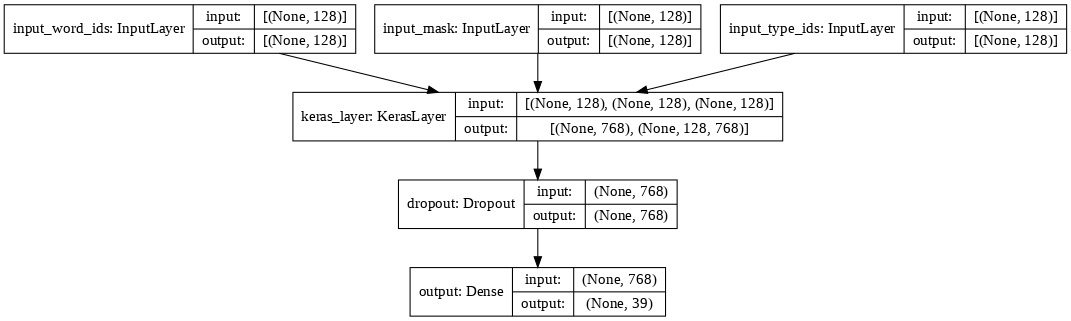

In [27]:
tf.keras.utils.plot_model(model=model,show_shapes= True, dpi=76)

In [28]:
# Train model
epochs = 15
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/15
63/63 [==============================] - 46s 516ms/step - loss: 3.6493 - sparse_categorical_accuracy: 0.0864 - val_loss: 2.9885 - val_sparse_categorical_accuracy: 0.1688
Epoch 2/15
63/63 [==============================] - 33s 502ms/step - loss: 2.8871 - sparse_categorical_accuracy: 0.2408 - val_loss: 2.1433 - val_sparse_categorical_accuracy: 0.4854
Epoch 3/15
63/63 [==============================] - 33s 502ms/step - loss: 2.1440 - sparse_categorical_accuracy: 0.4556 - val_loss: 1.5899 - val_sparse_categorical_accuracy: 0.6187
Epoch 4/15
63/63 [==============================] - 33s 502ms/step - loss: 1.5167 - sparse_categorical_accuracy: 0.6252 - val_loss: 1.2212 - val_sparse_categorical_accuracy: 0.7271
Epoch 5/15
63/63 [==============================] - 33s 502ms/step - loss: 1.0545 - sparse_categorical_accuracy: 0.7684 - val_loss: 0.9955 - val_sparse_categorical_accuracy: 0.7688
Epoch 6/15
63/63 [==============================] - 33s 502ms/step - loss: 0.7557 - sparse_cate

## Task 11: Evaluate the BERT Text Classification Model

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

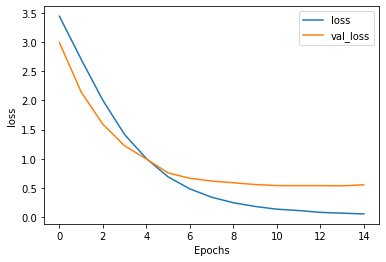

In [30]:
plot_graphs(history,'loss')

In [31]:
plot_graphs(history,'binary_accuracy')

KeyError: ignored

In [32]:
sample_example=['UC Good Morning Report shows the following job(s) failed on report from am on / to am on /:PSF.AP..AP_JPMC_PROCESS_RESPONSE_FILE JOBS  PeopleSoft   KIRK.TAYLOR/ADMIN ENDED_NOT_OK - aborted    :: // : // : // : FPROD (ASCUC)']
test_data = tf.data.Dataset.from_tensor_slices((sample_example,[0]*len(sample_example))) #second para is dummy '0' label 
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
preds


array([[6.0431059e-05, 9.9542052e-01, 4.7517864e-05, 3.1363854e-06,
        6.8597592e-06, 1.0554869e-05, 5.8106343e-05, 2.9691050e-04,
        1.6700977e-04, 3.7026017e-05, 1.4728599e-04, 2.0542486e-05,
        2.2011100e-05, 5.5684370e-04, 1.8327530e-05, 1.3732792e-04,
        2.8350816e-05, 8.0816579e-05, 2.5485082e-05, 1.4462331e-04,
        2.0543621e-05, 3.3414664e-05, 4.4247066e-05, 3.4468801e-04,
        1.4731639e-05, 3.3232540e-05, 3.0022922e-05, 5.1341056e-05,
        1.2219656e-03, 3.5087669e-05, 1.5978841e-04, 1.9726445e-05,
        2.2159200e-04, 1.0276861e-05, 7.3194497e-05, 1.3978462e-05,
        9.4855946e-05, 2.5199261e-04, 3.5479472e-05]], dtype=float32)

In [ ]:
#tensorflow serving